<a href="https://colab.research.google.com/github/AliGreo/Deep-Learning-with-Tensorflow-and-Pytorch-Projects/blob/main/DNN_vs_CNN_MNIST_AUTOENCODERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import tensorflow as tf
from keras import layers, models
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape)
X_train = X_train/255.0
X_test = X_test/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


## Deep Dense AutoEncoder

In [6]:
X_train_dnn = X_train.reshape(-1, 784)
X_test_dnn = X_test.reshape(-1, 784)

inputs = layers.Input(shape=(784,))

encoder_1 = layers.Dense(512, activation="relu")(inputs)
encoder_2 = layers.Dense(256, activation="relu")(encoder_1)

decoder_1 = layers.Dense(256, activation="relu")(encoder_2)
decoder = layers.Dense(784, activation="sigmoid")(decoder_1)

encoder_model = models.Model(inputs=inputs, outputs=encoder_2)
decoder_model = models.Model(inputs=inputs, outputs=decoder)

decoder_model.compile(loss="binary_crossentropy", optimizer="adam")

decoder_model.fit(X_train_dnn, X_train_dnn, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1474
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0768
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0725
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0708
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0694
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0686
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0680
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0676
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0671
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0670
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0667
Epoch 12/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0665
Epoch 13/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0664
Epoch 14/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0661
Epoch 15/50
1875/1875 ━━━━━━━

In [8]:
print(decoder_model.summary())

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 784)                 │         201,488 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,401,586 (9.16 MB)

 Trainable params: 800,528 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,601,058 (6.11 MB)

None


In [9]:
test_sample = X_train_dnn[50].reshape(1,-1)
print(test_sample.shape)

output = decoder_model.predict(test_sample)

(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


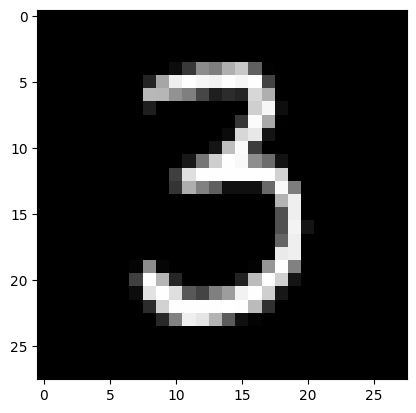

In [13]:
import matplotlib.pyplot as plt

def visualize(img):
    plt.imshow(img.reshape(28,28), cmap="gray")
    plt.show()

visualize(test_sample)

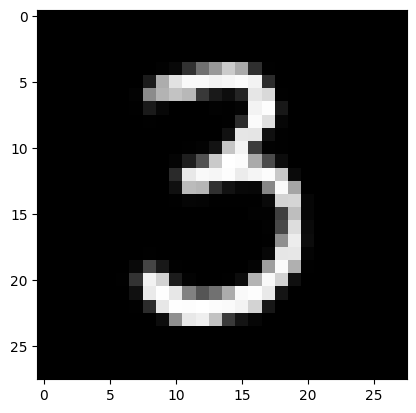

In [14]:
visualize(output)

## Deep CNN AutoEncoder

In [15]:
def encoder():
    inputs = layers.Input(shape=(28,28, 1))
    conv_1 = layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(inputs)
    max_pool_1 = layers.MaxPool2D((2,2))(conv_1)
    conv_2 = layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(max_pool_1)
    max_pool_2 = layers.MaxPool2D((2,2))(conv_2)

    return inputs, max_pool_2

def decoder(inputs, decoder):
    up_1 = layers.UpSampling2D((2,2))(decoder)
    conv_1 = layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(up_1)
    up_2 = layers.UpSampling2D((2,2))(conv_1)
    conv_2 = layers.Conv2D(filters=1, kernel_size=(3,3), padding="same", activation="sigmoid")(up_2)

    model = models.Model(inputs=inputs, outputs=conv_2)

    return model


inputs, encoder_= encoder()
decoder_ = decoder(inputs, encoder_)

decoder_.compile(loss="binary_crossentropy", optimizer="adam")

print(decoder_.summary())

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 512)         │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 1)           │           1,153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,956,033 (11.28 MB)

 Trainable params: 2,956,033 (11.28 MB)

 Non-trainable params: 0 (0.00 B)

None


In [16]:
decoder_.fit(X_train, X_train, epochs=50, batch_size=32)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 26ms/step - loss: 0.0863
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 26ms/step - loss: 0.0627
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - loss: 0.0615
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - loss: 0.0610
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - loss: 0.0605
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - loss: 0.0603
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 0.0601
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 0.0598
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - loss: 0.0599
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - loss: 0.0597
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - loss: 0.0596
Epoch 12/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - loss: 0.0596
Epoch 13/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - loss: 0.0595
Epoch 14/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - loss: 0.0595
E

In [17]:
decoder_.save("ConvAutoEncoderMnist.keras")

In [18]:
from tensorflow.keras.models import load_model


model = load_model("/content/ConvAutoEncoderMnist.keras")

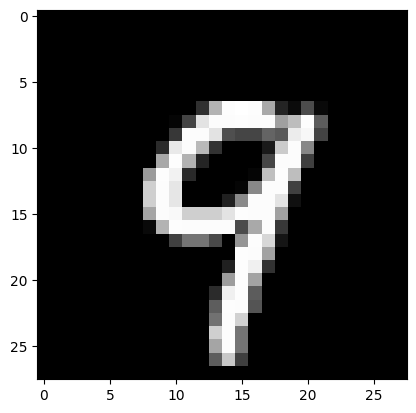

In [37]:
def visualize_cnn(img):
    plt.imshow(img, cmap="gray")
    plt.show()

visualize_cnn(X_test[12])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


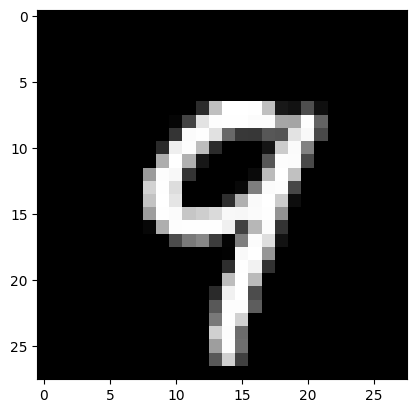

In [38]:
def predict_sample(id_test):
    img = X_test[id_test][np.newaxis,:, : ,np.newaxis]
    pred = model.predict(img).reshape(28,28)
    return pred

pred = predict_sample(12)

visualize_cnn(pred)

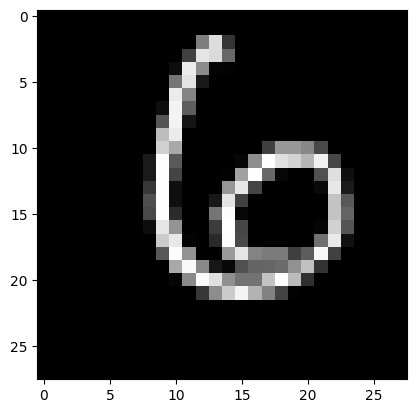

In [39]:
visualize_cnn(X_test[100])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


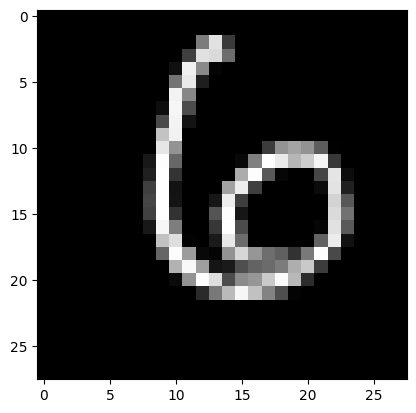

In [41]:
pred = predict_sample(100)

visualize_cnn(pred)